# Clase 9: Introducción a Manejo de Datos Tabulares con Pandas


**MDS7202: Laboratorio de Programación Científica para Ciencia de Datos**

**Profesor: Pablo Badilla**


### Objetivos de la clase

- Introducir los datos estructurados de forma tabular.
- Comprender los aspectos introductorios de `pandas`: `Series` y `DataFrames`.
- Indexado y operaciones básicas en `DataFrames`.
- Filtrados y queries. 



### Roadmap

**Unidad 3: Manejo de Datos con Pandas y AED**

- [X] Introducción a pandas: DataFrames, Series, Operaciones básicas y Filtrado.
- [ ] Agregaciones.
- [ ] Visualizaciones interactivas usando Plotly.
- [ ] Concatenaciones y fusión de Dataframes.
- [ ] Trabajo con strings y datos temporales, categóricos y ordinales en Pandas.



----

## 1. Pandas 🐼


`Pandas` una librería para python utilizada para manejar datos tabulares. 

<div align='center'>
<img src="./resources/dataframe.png" alt="DataFrames" style="width: 800px;"/>
</div>


Está diseñada para proveer herramientas que faciliten la exploración, limpieza y procesamiento de los datos. Su enfoque es *simplicidad y eficiencia*. Es, al igual que las librerías anteriores, *open-source*.


La base de pandas son los `DataFrames`.



Como convención, `Pandas` se importa de la siguiente manera:

In [1]:
import pandas as pd

### Entrada / Salida (IO)

La lectura de datos en `pandas` es muy sencilla: `pandas` es compatible con muchos tipos de archivos y fuentes de datos de forma nativa:

- `CSV`
- `Excel`
- `SQL`
- `Json`
- ...

Los datos almacenados en estas fuentes pueden ser importados a `DataFrames` a través de las funcioes `read_*`

De la misma forma, es capaz de guardar los DataFrames en el formato que deseen usando las funciones `to_*`

<div align='center'>

<img src="./resources/pandas_io.png" alt="DataFrames" style="width: 800px;"/>
</div>
    
Toda la información acerca de que puede o no leer la encuentran en la siguiente referencia: https://pandas.pydata.org/docs/user_guide/io.html

### Índices para una Vida Mejor

Para explicar `pandas`, analizaremos datos de la OECD, en particular de los índices para una Vida Mejor:


<img src="./resources/oecd.png" alt="OECD Better life index"/>


http://www.oecdbetterlifeindex.org/

https://stats.oecd.org/Index.aspx?DataSetCode=BLI

Son 11 temas considerados como esenciales para el bienestar de la población. Cada crierio contiene uno o mas indicadores

| Tema | Indicador (Inglés) | Indicador (Español) | Unidad | Descripción |
|---|---|---|---|---|
| Vivienda 🏠 | Dwellings without basic facilities | Vivienda con Instalaciones Básicas | Porcentaje | Porcentaje de personas con inodoros de agua corriente dentro del hogar, año disponible más reciente |
|  | Housing expenditure | Gastos en Vivienda | Porcentaje | Proporción de costos de vivienda en el ingreso neto ajustado de las familias, año disponible más reciente |
|  | Rooms per person | Habitaciones por Persona | Ratio | Número promedio de habitaciones compartidas por persona en una vivienda, año disponible más reciente |
| Ingresos 💰 | Household net adjusted disposable income | Ingreso Familiar Disponible | US Dollar | Cantidad promedio de dinero que una familia gana al año, después de impuestos, año disponible más reciente |
|  | Household net wealth | Patrimonio Neto Familiar | US Dollar | Valor total promedio de los activos financieros de una familia (ahorros, acciones) menos sus pasivos (créditos), año disponible más reciente |
| Empleo ⚙️ | Labour market insecurity | Seguridad en el Empleo | Porcentaje | Pérdida esperada de ingresos cuando alguien queda desempleado, año disponible más reciente |
|  | Employment rate | Tasa de Empleo | Porcentaje | Porcentaje de personas, de 15 a 64 años de edad, actualmente con empleo remunerado, año disponible más reciente |
|  | Long-term unemployment rate | Tasa de Empleo a Largo Plazo | Porcentaje | Porcentaje de personas, de 15 a 64 años de edad, que no trabajan pero que han buscado empleo activamente durante más de un año, año disponible más reciente |
|  | Personal earnings | Ingresos Personales | US Dollar | Ingresos anuales promedio por empleado de tiempo completo, año disponible más reciente |
| Comunidad 🧑‍🤝‍🧑   | Quality of support network  | Calidad del Apoyo Social | Porcentaje | Porcentaje de personas con amigos o parientes en quienes confiar en caso de necesidad |
| Educación 📚 | Educational attainment | Nivel de Educación | Porcentaje | Porcentaje de personas, de 25 a 64 años de edad, graduadas por lo menos de educación media superior, año disponible más reciente |
|  | Student skills | Competencias de estudiantes en matemáticas, lectura y ciencias | Puntaje promedio | Desempeño promedio de estudiantes de 15 años de edad, según PISA (Programa para la Evaluación Internacional de Estudiantes) |
|  | Years in education  | Nivel de educación | Años | Duración promedio de la educación formal en la que un niño de cinco años de edad puede esperar matricularse durante su vida |
| Medio Ambiente 🌳 | Air pollution | Contaminación del Aire | Microgramos por metro cúbico | Concentración promedio de partículas (PM2.5) en ciudades con poblaciones mayores de 100,000 personas, medida en microgramos por metro cúbico, año disponible más reciente |
|  | Water quality | Calidad del Agua | Porcentaje | Porcentaje de personas que informan estar satisfechas con la calidad del agua local |
| Compromiso Cívico 🗳️  | Stakeholder engagement for developing regulations | Participación de los interesados en la elaboración de regulaciones | Puntaje promedio | Nivel de transparencia gubernamental al preparar las regulaciones, año disponible más reciente |
|  | Voter turnout | Participación electoral | Porcentaje | Porcentaje de votantes registrados que votaron durante las elecciones recientes, año disponible más reciente |
| Salud ⚕️ | Life expectancy | Esperanza de vida | Años | Número promedio de años que una persona puede esperar vivir, año disponible más reciente |
|  | Self-reported health | Salud según informan las personas | Porcentaje | Porcentaje de personas que informan que su salud es «buena o muy buena», año disponible más reciente |
| Satisfacción ✨ | Life satisfaction | Satisfacción ante la vida | Puntaje promedio | Autoevaluación promedio de satisfacción ante la vida, en una escala de 0 a 10 |
| Seguridad 🌃 | Feeling safe walking alone at night | Sentimiento de seguridad al caminar solos por la noche | Porcentaje | Porcentaje de personas que reportan sentirse seguras al caminar solas por la noche  |
|  | Homicide rate | Tasa de homicidios | Ratio | Número promedio de homicidios reportados por 100,000 personas, año disponible más reciente |
| Balance Vida Trabajo 🧘 | Employees working very long hours | Empleados que trabajan muchas horas | Porcentaje | Porcentaje de empleados que trabajan más de cincuenta horas a la semana en promedio, año disponible más reciente |
|  | Time devoted to leisure and personal care | Tiempo destinado al ocio y el cuidado personal | Horas | Número promedio de minutos al día dedicados al ocio y el cuidado personal, incluidos el sueño y la alimentación |

### Importar el Dataset

A continuacion, importaremos el dataset a un `DataFrame`. Noten la gran compatiblidad de `Jupyter` con los DataFrames (DF).

Cada DataFrame tiene **indices (Primera columna ) y columnas (primera fila)**. Comunmente se ocupan:

- En las columnas se ocupan `strings` que identifican el nombre de la variable.
- Enteros que identifican el número de la observación en las filas. 

Sin embargo, las filas también pueden ser identificadas por strings como las columnas por enteros

In [2]:
# para abrir archivos excel y visualizar hay que instalar esta dependencia extra
!pip install openpyxl matplotlib plotly statsmodels

In [3]:
import pandas as pd

df = pd.read_excel('./resources/dataset.xlsx', header=1)
df

,Country,Dwellings without basic facilities,Housing expenditure,Rooms per person,Household net adjusted disposable income,Household net wealth,Labour market insecurity,Employment rate,Long-term unemployment rate,Personal earnings,...,Water quality,Stakeholder engagement for developing regulations,Voter turnout,Life expectancy,Self-reported health,Life satisfaction,Feeling safe walking alone at night,Homicide rate,Employees working very long hours,Time devoted to leisure and personal care
0,Australia,NaN,20.0,NaN,32759.0,427064.0,5.4,73,1.31,49126.0,...,93,2.7,91,82.5,85.0,7.3,63.5,1.1,13.04,14.35
1,Austria,0.9,21.0,1.6,33541.0,308325.0,3.5,72,1.84,50349.0,...,92,1.3,80,81.7,70.0,7.1,80.6,0.5,6.66,14.55
2,Belgium,1.9,21.0,2.2,30364.0,386006.0,3.7,63,3.54,49675.0,...,84,2.0,89,81.5,74.0,6.9,70.1,1.0,4.75,15.70
3,Canada,0.2,22.0,2.6,30854.0,423849.0,6.0,73,0.77,47622.0,...,91,2.9,68,81.9,88.0,7.4,82.2,1.3,3.69,14.56
4,Chile,9.4,18.0,1.2,NaN,100967.0,8.7,63,NaN,25879.0,...,71,1.3,47,79.9,57.0,6.5,47.9,4.2,9.72,NaN
5,Colombia,23.9,17.0,1.2,NaN,NaN,NaN,67,0.79,NaN,...,75,1.4,53,76.2,NaN,6.3,44.4,24.5,26.56,NaN
6,Czech Republic,0.7,24.0,1.4,21453.0,NaN,3.1,74,1.04,25372.0,...,87,1.6,61,79.1,60.0,6.7,72.3,0.5,5.65,NaN
7,Denmark,0.5,23.0,1.9,29606.0,118637.0,4.2,74,1.31,51466.0,...,95,2.0,86,80.9,71.0,7.6,83.5,0.6,2.34,15.87
8,Estonia,7.0,17.0,1.6,19697.0,159373.0,3.8,74,1.92,24336.0,...,84,2.7,64,77.8,53.0,5.7,69.0,3.1,2.42,14.90
9,Finland,0.5,23.0,1.9,29943.0,200827.0,3.9,70,2.13,42964.0,...,95,2.2,67,81.5,70.0,7.6,85.1,1.3,3.81,15.17


## 2.- Lo Básico

A continuación veremos los atributos y métodos básicos de un DataFrame.

### Atributos

#### Columnas

Podemos ver los nombres de las columnas de nuestro `DataFrame` a través de `df.columns`

In [4]:
df.columns

Index(['Country', 'Dwellings without basic facilities', 'Housing expenditure',
       'Rooms per person', 'Household net adjusted disposable income',
       'Household net wealth', 'Labour market insecurity', 'Employment rate',
       'Long-term unemployment rate', 'Personal earnings',
       'Quality of support network', 'Educational attainment',
       'Student skills', 'Years in education', 'Air pollution',
       'Water quality', 'Stakeholder engagement for developing regulations',
       'Voter turnout', 'Life expectancy', 'Self-reported health',
       'Life satisfaction', 'Feeling safe walking alone at night',
       'Homicide rate', 'Employees working very long hours',
       'Time devoted to leisure and personal care'],
      dtype='object')

#### Índices

Podemos ver los indices de las filas de nuestro `DataFrame` a través de `df.index`

In [5]:
df.index

RangeIndex(start=0, stop=41, step=1)

#### Largo (cántidad de filas)

In [6]:
len(df)

41

#### Shape

In [7]:
df.shape

(41, 25)

### Seleccion de Algunos Elementos

#### Head

Trae los primeros n elementos


In [8]:
df.head(5)

,Country,Dwellings without basic facilities,Housing expenditure,Rooms per person,Household net adjusted disposable income,Household net wealth,Labour market insecurity,Employment rate,Long-term unemployment rate,Personal earnings,...,Water quality,Stakeholder engagement for developing regulations,Voter turnout,Life expectancy,Self-reported health,Life satisfaction,Feeling safe walking alone at night,Homicide rate,Employees working very long hours,Time devoted to leisure and personal care
0,Australia,NaN,20.0,NaN,32759.0,427064.0,5.4,73,1.31,49126.0,...,93,2.7,91,82.5,85.0,7.3,63.5,1.1,13.04,14.35
1,Austria,0.9,21.0,1.6,33541.0,308325.0,3.5,72,1.84,50349.0,...,92,1.3,80,81.7,70.0,7.1,80.6,0.5,6.66,14.55
2,Belgium,1.9,21.0,2.2,30364.0,386006.0,3.7,63,3.54,49675.0,...,84,2.0,89,81.5,74.0,6.9,70.1,1.0,4.75,15.70
3,Canada,0.2,22.0,2.6,30854.0,423849.0,6.0,73,0.77,47622.0,...,91,2.9,68,81.9,88.0,7.4,82.2,1.3,3.69,14.56
4,Chile,9.4,18.0,1.2,NaN,100967.0,8.7,63,NaN,25879.0,...,71,1.3,47,79.9,57.0,6.5,47.9,4.2,9.72,NaN


#### Tail

Trae los últimos n elementos


In [9]:
df.tail(5)

,Country,Dwellings without basic facilities,Housing expenditure,Rooms per person,Household net adjusted disposable income,Household net wealth,Labour market insecurity,Employment rate,Long-term unemployment rate,Personal earnings,...,Water quality,Stakeholder engagement for developing regulations,Voter turnout,Life expectancy,Self-reported health,Life satisfaction,Feeling safe walking alone at night,Homicide rate,Employees working very long hours,Time devoted to leisure and personal care
36,United States,0.1,19.0,2.4,45284.0,632100.0,7.7,70,0.66,60558.0,...,83,3.1,65,78.6,88.0,6.9,73.9,5.5,11.09,14.44
37,OECD - Total,4.4,20.0,1.8,33604.0,408376.0,7.0,68,1.78,43241.0,...,81,2.4,68,80.2,69.0,6.5,68.4,3.7,11.01,14.98
38,Brazil,6.7,NaN,NaN,NaN,NaN,NaN,61,NaN,NaN,...,73,2.2,79,74.8,NaN,6.4,35.6,26.7,7.13,NaN
39,Russia,14.8,18.0,0.9,NaN,NaN,NaN,70,1.59,NaN,...,55,NaN,68,71.8,43.0,5.8,52.8,9.6,0.14,NaN
40,South Africa,37.0,18.0,NaN,NaN,NaN,NaN,43,16.46,NaN,...,67,NaN,73,57.5,NaN,4.7,36.1,13.7,18.12,14.92


#### Sample

Entrega n filas aleatorias

In [10]:
df.sample(5)

,Country,Dwellings without basic facilities,Housing expenditure,Rooms per person,Household net adjusted disposable income,Household net wealth,Labour market insecurity,Employment rate,Long-term unemployment rate,Personal earnings,...,Water quality,Stakeholder engagement for developing regulations,Voter turnout,Life expectancy,Self-reported health,Life satisfaction,Feeling safe walking alone at night,Homicide rate,Employees working very long hours,Time devoted to leisure and personal care
20,Latvia,13.9,23.0,1.2,16275.0,70160.0,9.6,70,3.35,23683.0,...,79,2.2,59,74.7,47.0,5.9,62.4,4.8,1.27,13.83
6,Czech Republic,0.7,24.0,1.4,21453.0,NaN,3.1,74,1.04,25372.0,...,87,1.6,61,79.1,60.0,6.7,72.3,0.5,5.65,NaN
36,United States,0.1,19.0,2.4,45284.0,632100.0,7.7,70,0.66,60558.0,...,83,3.1,65,78.6,88.0,6.9,73.9,5.5,11.09,14.44
33,Switzerland,0.1,22.0,1.9,37466.0,NaN,NaN,80,1.82,62283.0,...,95,2.3,49,83.7,78.0,7.5,85.3,0.6,0.37,NaN
5,Colombia,23.9,17.0,1.2,NaN,NaN,NaN,67,0.79,NaN,...,75,1.4,53,76.2,NaN,6.3,44.4,24.5,26.56,NaN


> **Pregunta ❓** Recordando al funcionamiento en numpy, ¿podremos utilizar Head, Tail y Sample sobre las columnas?

In [11]:
df.sample(3, axis=1)

,Life satisfaction,Household net adjusted disposable income,Self-reported health
0,7.3,32759.0,85.0
1,7.1,33541.0,70.0
2,6.9,30364.0,74.0
3,7.4,30854.0,88.0
4,6.5,NaN,57.0
5,6.3,NaN,NaN
6,6.7,21453.0,60.0
7,7.6,29606.0,71.0
8,5.7,19697.0,53.0
9,7.6,29943.0,70.0


> **Pregunta ❓** ¿Cuál es la unidad más básica que los `DataFrames`?

In [12]:
df.values

array([['Australia', nan, 20.0, ..., 1.1, 13.04, 14.35],
       ['Austria', 0.9, 21.0, ..., 0.5, 6.66, 14.55],
       ['Belgium', 1.9, 21.0, ..., 1.0, 4.75, 15.7],
       ...,
       ['Brazil', 6.7, nan, ..., 26.7, 7.13, nan],
       ['Russia', 14.8, 18.0, ..., 9.6, 0.14, nan],
       ['South Africa', 37.0, 18.0, ..., 13.7, 18.12, 14.92]],
      dtype=object)

## 3.- `Series`

Los objetos tipo `pd.Series` son los objetos base de los DataFrames. Estos consisten en un arreglo unidimensional (que puede contener una sucesión de valores u objetos) asociados a un índice. Además, opcionalmente pueden llevar un nombre (que sería el equivalente al nombre de la columna de un DataFrame).

In [13]:
serie = pd.Series([1,9,7, -5, 3,10], name='Mi serie')
serie

0     1
1     9
2     7
3    -5
4     3
5    10
Name: Mi serie, dtype: int64

In [14]:
serie.values

array([ 1,  9,  7, -5,  3, 10])

In [15]:
serie.index

RangeIndex(start=0, stop=6, step=1)

In [16]:
serie.dtype

dtype('int64')

In [17]:
serie.name

'Mi serie'

In [18]:
serie.shape

(6,)

Podemos acceder a cualquier elemento de una serie usando los mismos principios de indexado que en `numpy`:

In [19]:
serie[0]

1

In [20]:
serie[0:1]

0    1
Name: Mi serie, dtype: int64

In [21]:
serie[0:4]

0    1
1    9
2    7
3   -5
Name: Mi serie, dtype: int64

Podemos también cambiar los índices de la serie y fijarlos como strings:

In [22]:
serie.index = ['a', 'b', 'c', 'd', 'e', 'f']
serie

a     1
b     9
c     7
d    -5
e     3
f    10
Name: Mi serie, dtype: int64

Ahora, el acceso a las filas de la serie se puede hacer usando los strings establecidos

In [23]:
serie['a']

1

In [24]:
serie[['a', 'b', 'f']]

a     1
b     9
f    10
Name: Mi serie, dtype: int64

Como también, usando indexadores con el número de las filas

In [25]:
serie[1:4]

b    9
c    7
d   -5
Name: Mi serie, dtype: int64

Las Series también permiten reemplazar sus valores:

In [26]:
serie['a'] = 9999
serie

a    9999
b       9
c       7
d      -5
e       3
f      10
Name: Mi serie, dtype: int64

In [27]:
serie['f'] = -1
serie

a    9999
b       9
c       7
d      -5
e       3
f      -1
Name: Mi serie, dtype: int64

### Acceder a una serie en específico

Volviendo a nuestro ejemplo, podemos acceder a las series de nuestro Dataset por medio de un indexador al cual se le provee el nombre de alguna columna.

In [28]:
df.head(5)

,Country,Dwellings without basic facilities,Housing expenditure,Rooms per person,Household net adjusted disposable income,Household net wealth,Labour market insecurity,Employment rate,Long-term unemployment rate,Personal earnings,...,Water quality,Stakeholder engagement for developing regulations,Voter turnout,Life expectancy,Self-reported health,Life satisfaction,Feeling safe walking alone at night,Homicide rate,Employees working very long hours,Time devoted to leisure and personal care
0,Australia,NaN,20.0,NaN,32759.0,427064.0,5.4,73,1.31,49126.0,...,93,2.7,91,82.5,85.0,7.3,63.5,1.1,13.04,14.35
1,Austria,0.9,21.0,1.6,33541.0,308325.0,3.5,72,1.84,50349.0,...,92,1.3,80,81.7,70.0,7.1,80.6,0.5,6.66,14.55
2,Belgium,1.9,21.0,2.2,30364.0,386006.0,3.7,63,3.54,49675.0,...,84,2.0,89,81.5,74.0,6.9,70.1,1.0,4.75,15.70
3,Canada,0.2,22.0,2.6,30854.0,423849.0,6.0,73,0.77,47622.0,...,91,2.9,68,81.9,88.0,7.4,82.2,1.3,3.69,14.56
4,Chile,9.4,18.0,1.2,NaN,100967.0,8.7,63,NaN,25879.0,...,71,1.3,47,79.9,57.0,6.5,47.9,4.2,9.72,NaN


In [29]:
countries = df['Country']
print(type(countries))
countries

<class 'pandas.core.series.Series'>


0           Australia
1             Austria
2             Belgium
3              Canada
4               Chile
5            Colombia
6      Czech Republic
7             Denmark
8             Estonia
9             Finland
10             France
11            Germany
12             Greece
13            Hungary
14            Iceland
15            Ireland
16             Israel
17              Italy
18              Japan
19              Korea
20             Latvia
21          Lithuania
22         Luxembourg
23             Mexico
24        Netherlands
25        New Zealand
26             Norway
27             Poland
28           Portugal
29    Slovak Republic
30           Slovenia
31              Spain
32             Sweden
33        Switzerland
34             Turkey
35     United Kingdom
36      United States
37       OECD - Total
38             Brazil
39             Russia
40       South Africa
Name: Country, dtype: object

In [30]:
countries[4]

'Chile'

## 4.- Indexado de DataFrames

En esta sección veremos como seleccionar filas y columnas a través de distintos tipos de indexados.

<img src="./resources/subsets.png" alt="OECD Better life index"/>

In [31]:
df.head(5)

,Country,Dwellings without basic facilities,Housing expenditure,Rooms per person,Household net adjusted disposable income,Household net wealth,Labour market insecurity,Employment rate,Long-term unemployment rate,Personal earnings,...,Water quality,Stakeholder engagement for developing regulations,Voter turnout,Life expectancy,Self-reported health,Life satisfaction,Feeling safe walking alone at night,Homicide rate,Employees working very long hours,Time devoted to leisure and personal care
0,Australia,NaN,20.0,NaN,32759.0,427064.0,5.4,73,1.31,49126.0,...,93,2.7,91,82.5,85.0,7.3,63.5,1.1,13.04,14.35
1,Austria,0.9,21.0,1.6,33541.0,308325.0,3.5,72,1.84,50349.0,...,92,1.3,80,81.7,70.0,7.1,80.6,0.5,6.66,14.55
2,Belgium,1.9,21.0,2.2,30364.0,386006.0,3.7,63,3.54,49675.0,...,84,2.0,89,81.5,74.0,6.9,70.1,1.0,4.75,15.70
3,Canada,0.2,22.0,2.6,30854.0,423849.0,6.0,73,0.77,47622.0,...,91,2.9,68,81.9,88.0,7.4,82.2,1.3,3.69,14.56
4,Chile,9.4,18.0,1.2,NaN,100967.0,8.7,63,NaN,25879.0,...,71,1.3,47,79.9,57.0,6.5,47.9,4.2,9.72,NaN


### Selector de Columnas

Veamos ahora alguna columna en particular, como por ejemplo:

**Water quality 💧**:
    
> Porcentaje de personas que informan estar satisfechas con la calidad del agua local


Para seleccionar más de una columna, podemos entregar un arreglo de nombres de columnas al DataFrame:

In [32]:
df[['Country', 'Water quality']]

,Country,Water quality
0,Australia,93
1,Austria,92
2,Belgium,84
3,Canada,91
4,Chile,71
5,Colombia,75
6,Czech Republic,87
7,Denmark,95
8,Estonia,84
9,Finland,95


### Selector de filas

Para seleccionar filas, podemos entregar un indexador de filas al estilo `numpy`:


In [33]:
df[0:5]

,Country,Dwellings without basic facilities,Housing expenditure,Rooms per person,Household net adjusted disposable income,Household net wealth,Labour market insecurity,Employment rate,Long-term unemployment rate,Personal earnings,...,Water quality,Stakeholder engagement for developing regulations,Voter turnout,Life expectancy,Self-reported health,Life satisfaction,Feeling safe walking alone at night,Homicide rate,Employees working very long hours,Time devoted to leisure and personal care
0,Australia,NaN,20.0,NaN,32759.0,427064.0,5.4,73,1.31,49126.0,...,93,2.7,91,82.5,85.0,7.3,63.5,1.1,13.04,14.35
1,Austria,0.9,21.0,1.6,33541.0,308325.0,3.5,72,1.84,50349.0,...,92,1.3,80,81.7,70.0,7.1,80.6,0.5,6.66,14.55
2,Belgium,1.9,21.0,2.2,30364.0,386006.0,3.7,63,3.54,49675.0,...,84,2.0,89,81.5,74.0,6.9,70.1,1.0,4.75,15.70
3,Canada,0.2,22.0,2.6,30854.0,423849.0,6.0,73,0.77,47622.0,...,91,2.9,68,81.9,88.0,7.4,82.2,1.3,3.69,14.56
4,Chile,9.4,18.0,1.2,NaN,100967.0,8.7,63,NaN,25879.0,...,71,1.3,47,79.9,57.0,6.5,47.9,4.2,9.72,NaN


> **Pregunta ❓**: ¿Cómo seleccionamos filas y columnas en particular?


In [34]:
df[0:5][['Country', 'Water quality']]

,Country,Water quality
0,Australia,93
1,Austria,92
2,Belgium,84
3,Canada,91
4,Chile,71


> **Pregunta ❓**: ¿Será esta una buena idea?

### Loc: Indexador por etiquetas

Permite acceder ciertos elementos por nombre de columnas y nombre de índices

In [35]:
df.loc[0:5, ['Country', 'Water quality']]

,Country,Water quality
0,Australia,93
1,Austria,92
2,Belgium,84
3,Canada,91
4,Chile,71
5,Colombia,75


In [36]:
df.index = df['Country']
df

,Country,Dwellings without basic facilities,Housing expenditure,Rooms per person,Household net adjusted disposable income,Household net wealth,Labour market insecurity,Employment rate,Long-term unemployment rate,Personal earnings,...,Water quality,Stakeholder engagement for developing regulations,Voter turnout,Life expectancy,Self-reported health,Life satisfaction,Feeling safe walking alone at night,Homicide rate,Employees working very long hours,Time devoted to leisure and personal care
Country,,,,,,,,,,,,,,,,,,,,,
Australia,Australia,NaN,20.0,NaN,32759.0,427064.0,5.4,73,1.31,49126.0,...,93,2.7,91,82.5,85.0,7.3,63.5,1.1,13.04,14.35
Austria,Austria,0.9,21.0,1.6,33541.0,308325.0,3.5,72,1.84,50349.0,...,92,1.3,80,81.7,70.0,7.1,80.6,0.5,6.66,14.55
Belgium,Belgium,1.9,21.0,2.2,30364.0,386006.0,3.7,63,3.54,49675.0,...,84,2.0,89,81.5,74.0,6.9,70.1,1.0,4.75,15.70
Canada,Canada,0.2,22.0,2.6,30854.0,423849.0,6.0,73,0.77,47622.0,...,91,2.9,68,81.9,88.0,7.4,82.2,1.3,3.69,14.56
Chile,Chile,9.4,18.0,1.2,NaN,100967.0,8.7,63,NaN,25879.0,...,71,1.3,47,79.9,57.0,6.5,47.9,4.2,9.72,NaN
Colombia,Colombia,23.9,17.0,1.2,NaN,NaN,NaN,67,0.79,NaN,...,75,1.4,53,76.2,NaN,6.3,44.4,24.5,26.56,NaN
Czech Republic,Czech Republic,0.7,24.0,1.4,21453.0,NaN,3.1,74,1.04,25372.0,...,87,1.6,61,79.1,60.0,6.7,72.3,0.5,5.65,NaN
Denmark,Denmark,0.5,23.0,1.9,29606.0,118637.0,4.2,74,1.31,51466.0,...,95,2.0,86,80.9,71.0,7.6,83.5,0.6,2.34,15.87
Estonia,Estonia,7.0,17.0,1.6,19697.0,159373.0,3.8,74,1.92,24336.0,...,84,2.7,64,77.8,53.0,5.7,69.0,3.1,2.42,14.90


In [37]:
df.loc[['Chile', 'Brazil', 'Mexico'], ['Water quality']]

,Water quality
Country,
Chile,71
Brazil,73
Mexico,68


### Iloc: Indexador por Índices

In [38]:
df.iloc[[10,11,12], [1,2,5]]

,Dwellings without basic facilities,Housing expenditure,Household net wealth
Country,,,
France,0.5,21.0,280653.0
Germany,0.2,20.0,259667.0
Greece,0.5,23.0,150134.0


> **Pregunta ❓**: ¿Qué utilidad tiene seleccionar filas/columnas solo por enteros?

In [39]:
import numpy as np

solo_pares = np.arange(0, len(df), 2)
solo_pares

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32,
       34, 36, 38, 40])

In [40]:
df.iloc[solo_pares, :]

,Country,Dwellings without basic facilities,Housing expenditure,Rooms per person,Household net adjusted disposable income,Household net wealth,Labour market insecurity,Employment rate,Long-term unemployment rate,Personal earnings,...,Water quality,Stakeholder engagement for developing regulations,Voter turnout,Life expectancy,Self-reported health,Life satisfaction,Feeling safe walking alone at night,Homicide rate,Employees working very long hours,Time devoted to leisure and personal care
Country,,,,,,,,,,,,,,,,,,,,,
Australia,Australia,NaN,20.0,NaN,32759.0,427064.0,5.4,73,1.31,49126.0,...,93,2.7,91,82.5,85.0,7.3,63.5,1.1,13.04,14.35
Belgium,Belgium,1.9,21.0,2.2,30364.0,386006.0,3.7,63,3.54,49675.0,...,84,2.0,89,81.5,74.0,6.9,70.1,1.0,4.75,15.70
Chile,Chile,9.4,18.0,1.2,NaN,100967.0,8.7,63,NaN,25879.0,...,71,1.3,47,79.9,57.0,6.5,47.9,4.2,9.72,NaN
Czech Republic,Czech Republic,0.7,24.0,1.4,21453.0,NaN,3.1,74,1.04,25372.0,...,87,1.6,61,79.1,60.0,6.7,72.3,0.5,5.65,NaN
Estonia,Estonia,7.0,17.0,1.6,19697.0,159373.0,3.8,74,1.92,24336.0,...,84,2.7,64,77.8,53.0,5.7,69.0,3.1,2.42,14.90
France,France,0.5,21.0,1.8,31304.0,280653.0,7.6,65,4.00,43755.0,...,81,2.1,75,82.4,66.0,6.5,70.5,0.5,7.67,16.36
Greece,Greece,0.5,23.0,1.2,17700.0,150134.0,29.8,53,15.65,26064.0,...,69,1.8,64,81.5,74.0,5.4,60.0,0.8,6.42,NaN
Iceland,Iceland,0.0,24.0,1.6,NaN,NaN,0.7,86,0.26,61787.0,...,99,2.1,79,82.3,76.0,7.5,86.0,0.5,15.06,NaN
Israel,Israel,NaN,NaN,1.2,NaN,NaN,4.2,69,0.49,35067.0,...,67,2.5,72,82.5,84.0,7.2,69.8,1.8,15.45,NaN


### Mascaras: Selección por Booleanos


Una operación interesante de selcción es usar un arreglo de booleanos para seleccionar datos.

In [41]:
len(df)

41

In [42]:
seleccion_booleana = [False for i in df.index]
seleccion_booleana[0] = True
seleccion_booleana[-1] = True
seleccion_booleana

[True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True]

In [43]:
df.loc[seleccion_booleana, ['Country', 'Water quality']]

,Country,Water quality
Country,,
Australia,Australia,93
South Africa,South Africa,67


In [44]:
df.loc[df['Water quality'] > 80, :]

,Country,Dwellings without basic facilities,Housing expenditure,Rooms per person,Household net adjusted disposable income,Household net wealth,Labour market insecurity,Employment rate,Long-term unemployment rate,Personal earnings,...,Water quality,Stakeholder engagement for developing regulations,Voter turnout,Life expectancy,Self-reported health,Life satisfaction,Feeling safe walking alone at night,Homicide rate,Employees working very long hours,Time devoted to leisure and personal care
Country,,,,,,,,,,,,,,,,,,,,,
Australia,Australia,NaN,20.0,NaN,32759.0,427064.0,5.4,73,1.31,49126.0,...,93,2.7,91,82.5,85.0,7.3,63.5,1.1,13.04,14.35
Austria,Austria,0.9,21.0,1.6,33541.0,308325.0,3.5,72,1.84,50349.0,...,92,1.3,80,81.7,70.0,7.1,80.6,0.5,6.66,14.55
Belgium,Belgium,1.9,21.0,2.2,30364.0,386006.0,3.7,63,3.54,49675.0,...,84,2.0,89,81.5,74.0,6.9,70.1,1.0,4.75,15.70
Canada,Canada,0.2,22.0,2.6,30854.0,423849.0,6.0,73,0.77,47622.0,...,91,2.9,68,81.9,88.0,7.4,82.2,1.3,3.69,14.56
Czech Republic,Czech Republic,0.7,24.0,1.4,21453.0,NaN,3.1,74,1.04,25372.0,...,87,1.6,61,79.1,60.0,6.7,72.3,0.5,5.65,NaN
Denmark,Denmark,0.5,23.0,1.9,29606.0,118637.0,4.2,74,1.31,51466.0,...,95,2.0,86,80.9,71.0,7.6,83.5,0.6,2.34,15.87
Estonia,Estonia,7.0,17.0,1.6,19697.0,159373.0,3.8,74,1.92,24336.0,...,84,2.7,64,77.8,53.0,5.7,69.0,3.1,2.42,14.90
Finland,Finland,0.5,23.0,1.9,29943.0,200827.0,3.9,70,2.13,42964.0,...,95,2.2,67,81.5,70.0,7.6,85.1,1.3,3.81,15.17
France,France,0.5,21.0,1.8,31304.0,280653.0,7.6,65,4.00,43755.0,...,81,2.1,75,82.4,66.0,6.5,70.5,0.5,7.67,16.36


> **Pregunta ❓**: ¿Por qué es interesante esta funcionalidad?

## 5.- Operaciones con DataFrames



### `Describe`

Calcula estadísticas descriptivas ,

In [48]:
df.describe()

,Dwellings without basic facilities,Housing expenditure,Rooms per person,Household net adjusted disposable income,Household net wealth,Labour market insecurity,Employment rate,Long-term unemployment rate,Personal earnings,Quality of support network,...,Water quality,Stakeholder engagement for developing regulations,Voter turnout,Life expectancy,Self-reported health,Life satisfaction,Feeling safe walking alone at night,Homicide rate,Employees working very long hours,Time devoted to leisure and personal care
count,38.000000,39.000000,38.000000,30.000000,29.000000,34.000000,41.000000,39.000000,36.000000,41.000000,...,41.000000,39.000000,41.000000,41.000000,38.000000,41.000000,41.000000,41.000000,39.000000,23.000000
mean,5.057895,20.641026,1.636842,28000.533333,288004.724138,6.817647,68.463415,2.809744,39912.611111,90.097561,...,82.341463,2.166667,69.536585,79.597561,66.868421,6.534146,68.253659,3.436585,8.029744,15.080000
std,8.334093,2.497232,0.426438,7012.870020,164375.661472,5.827649,7.871142,3.533804,12932.304171,4.253263,...,10.415397,0.570933,12.060468,4.616952,14.092687,0.742836,13.847186,6.254469,7.783618,0.667717
min,0.000000,15.000000,0.900000,16275.000000,70160.000000,0.700000,43.000000,0.050000,15314.000000,78.000000,...,55.000000,1.200000,47.000000,57.500000,33.000000,4.700000,35.600000,0.200000,0.140000,13.830000
25%,0.325000,19.000000,1.200000,21504.750000,159373.000000,3.725000,66.000000,1.035000,26017.750000,88.000000,...,75.000000,1.750000,61.000000,78.000000,60.000000,5.900000,60.000000,0.600000,3.360000,14.630000
50%,0.950000,21.000000,1.650000,29469.500000,259667.000000,5.100000,69.000000,1.780000,41628.000000,91.000000,...,84.000000,2.200000,69.000000,81.300000,69.000000,6.500000,70.100000,1.000000,5.250000,14.920000
75%,6.625000,22.500000,1.900000,32395.250000,386006.000000,7.775000,74.000000,3.200000,49263.250000,93.000000,...,91.000000,2.550000,79.000000,82.400000,75.750000,7.200000,77.700000,3.100000,11.050000,15.590000
max,37.000000,26.000000,2.600000,45284.000000,769053.000000,29.800000,86.000000,16.460000,63062.000000,98.000000,...,99.000000,3.200000,91.000000,84.100000,88.000000,7.600000,90.100000,26.700000,32.640000,16.470000


### Contar valores

Cuenta el número de veces que aparece un valor. Útil cuanto trabajamos con datos ordinales y categóricos. **Solo funciona sobre Series**

> **Nota 📖**: Observa que en este ejemplo contamos y luego ordenamos. Esto se conoce como *Method chaining* y se ocupa bastante al usar `pandas`.

In [49]:
environmental_quality

,Country,Water quality,Air pollution
Country,,,
Australia,Australia,93,5
Austria,Austria,92,16
Belgium,Belgium,84,15
Canada,Canada,91,7
Chile,Chile,71,16
Colombia,Colombia,75,10
Czech Republic,Czech Republic,87,20
Denmark,Denmark,95,9
Estonia,Estonia,84,8


In [50]:
environmental_quality['Air pollution'].value_counts()

14    5
16    4
10    4
5     3
15    3
11    3
21    2
18    2
22    2
6     2
20    2
7     2
8     1
9     1
19    1
3     1
28    1
12    1
13    1
Name: Air pollution, dtype: int64

### Ordenar

Ordena según filas o columnas

Para los siguientes ejemplos, usaremos los datos de medioambientales para los siguientes ejemplos:


**Environmental quality**

    - Air pollution - contaminación atmosférica
    - Satisfaction with water quality - calidad del agua


> **Pregunta ❓**: ¿Cómo los obtenemos?






In [45]:
environmental_quality = df.loc[:, ['Country', 'Water quality', 'Air pollution']]
environmental_quality.sample(5)

,Country,Water quality,Air pollution
Country,,,
Mexico,Mexico,68,16
Brazil,Brazil,73,10
Netherlands,Netherlands,93,14
United States,United States,83,10
Luxembourg,Luxembourg,84,12


> **Nota 📖**: El proceso de ordenamiento genera un nuevo `DataFrame`! En general, esto es así con la mayoría de las operaciones `DataFrames`.

> **Nota 📖**: Observa que el DataFrame ordenado conserva los índices. Puedes cambiar este comportamiento usando `ignore_index = True`

> **Pregunta ❓**: ¿Podemos ordenar por más de una columa?


In [46]:
environmental_quality_sorted = environmental_quality.sort_values('Water quality', ascending=True)
environmental_quality_sorted

,Country,Water quality,Air pollution
Country,,,
Russia,Russia,55,15
Turkey,Turkey,65,20
South Africa,South Africa,67,22
Israel,Israel,67,21
Mexico,Mexico,68,16
Greece,Greece,69,18
Chile,Chile,71,16
Italy,Italy,71,18
Spain,Spain,72,11


In [47]:
environmental_quality_sorted = environmental_quality.sort_values(
    ['Water quality', 'Air pollution'], ascending=True)
environmental_quality_sorted

,Country,Water quality,Air pollution
Country,,,
Russia,Russia,55,15
Turkey,Turkey,65,20
Israel,Israel,67,21
South Africa,South Africa,67,22
Mexico,Mexico,68,16
Greece,Greece,69,18
Chile,Chile,71,16
Italy,Italy,71,18
Spain,Spain,72,11


### Rankings

Existen varios método para calcular rankings. La gran diferencia entre ellos es cómo manejan los datos de igual valor. En nuestro caso usaremos `min`. Es decir, si hay 2 valores repetidos, se les asigna el mínimo valor a ambos dentro del ranking.


Pueden ver la referencia completa en: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rank.html

In [51]:
water_quality_rank = environmental_quality['Water quality'].rank(method='min', ascending=False)
water_quality_rank

Country
Australia           7.0
Austria             9.0
Belgium            19.0
Canada             10.0
Chile              34.0
Colombia           31.0
Czech Republic     14.0
Denmark             4.0
Estonia            19.0
Finland             4.0
France             25.0
Germany            10.0
Greece             36.0
Hungary            29.0
Iceland             1.0
Ireland            17.0
Israel             38.0
Italy              34.0
Japan              14.0
Korea              30.0
Latvia             28.0
Lithuania          25.0
Luxembourg         19.0
Mexico             37.0
Netherlands         7.0
New Zealand        13.0
Norway              2.0
Poland             24.0
Portugal           16.0
Slovak Republic    17.0
Slovenia           12.0
Spain              33.0
Sweden              3.0
Switzerland         4.0
Turkey             40.0
United Kingdom     19.0
United States      23.0
OECD - Total       25.0
Brazil             32.0
Russia             41.0
South Africa       38.0
Name: Wa

In [52]:
air_pollution_rank = environmental_quality['Air pollution'].rank(method='min')
air_pollution_rank

Country
Australia           2.0
Austria            28.0
Belgium            25.0
Canada              7.0
Chile              28.0
Colombia           11.0
Czech Republic     35.0
Denmark            10.0
Estonia             9.0
Finland             5.0
France             19.0
Germany            20.0
Greece             32.0
Hungary            34.0
Iceland             1.0
Ireland             7.0
Israel             37.0
Italy              32.0
Japan              20.0
Korea              41.0
Latvia             15.0
Lithuania          20.0
Luxembourg         18.0
Mexico             28.0
Netherlands        20.0
New Zealand         2.0
Norway              2.0
Poland             39.0
Portugal           11.0
Slovak Republic    37.0
Slovenia           28.0
Spain              15.0
Sweden              5.0
Switzerland        25.0
Turkey             35.0
United Kingdom     15.0
United States      11.0
OECD - Total       20.0
Brazil             11.0
Russia             25.0
South Africa       39.0
Name: Ai

### `Cut` y `QCut`

#### `cut`

`pd.cut` permite separar los datos en bins de igual tamaño.


In [105]:
pd.cut(environmental_quality['Air pollution'], bins=5)

Country
Australia          (2.975, 8.0]
Austria            (13.0, 18.0]
Belgium            (13.0, 18.0]
Canada             (2.975, 8.0]
Chile              (13.0, 18.0]
Colombia            (8.0, 13.0]
Czech Republic     (18.0, 23.0]
Denmark             (8.0, 13.0]
Estonia            (2.975, 8.0]
Finland            (2.975, 8.0]
France              (8.0, 13.0]
Germany            (13.0, 18.0]
Greece             (13.0, 18.0]
Hungary            (18.0, 23.0]
Iceland            (2.975, 8.0]
Ireland            (2.975, 8.0]
Israel             (18.0, 23.0]
Italy              (13.0, 18.0]
Japan              (13.0, 18.0]
Korea              (23.0, 28.0]
Latvia              (8.0, 13.0]
Lithuania          (13.0, 18.0]
Luxembourg          (8.0, 13.0]
Mexico             (13.0, 18.0]
Netherlands        (13.0, 18.0]
New Zealand        (2.975, 8.0]
Norway             (2.975, 8.0]
Poland             (18.0, 23.0]
Portugal            (8.0, 13.0]
Slovak Republic    (18.0, 23.0]
Slovenia           (13.0, 18.0]


Los bins pueden llevar etiquetas asociadas a través del argumento `labels`:

In [111]:
air_pollution_cut = pd.cut(environmental_quality['Air pollution'], bins=5, labels=["Excelente", 'Bueno', "Medio", "Malo", 'Deplorable'])
air_pollution_cut

Country
Australia           Excelente
Austria                 Medio
Belgium                 Medio
Canada              Excelente
Chile                   Medio
Colombia                Bueno
Czech Republic           Malo
Denmark                 Bueno
Estonia             Excelente
Finland             Excelente
France                  Bueno
Germany                 Medio
Greece                  Medio
Hungary                  Malo
Iceland             Excelente
Ireland             Excelente
Israel                   Malo
Italy                   Medio
Japan                   Medio
Korea              Deplorable
Latvia                  Bueno
Lithuania               Medio
Luxembourg              Bueno
Mexico                  Medio
Netherlands             Medio
New Zealand         Excelente
Norway              Excelente
Poland                   Malo
Portugal                Bueno
Slovak Republic          Malo
Slovenia                Medio
Spain                   Bueno
Sweden              Excelente
Sw

#### `qcut`

`pd.qcut` permite dividir los datos por cuantiles (los que sean especificados, 4, 5, 10, 100, ...)
Podemos especificar como nombrar los cuantiles a través del atributo `labels`:

In [107]:
air_pollution_qcut = pd.qcut(environmental_quality['Air pollution'], 5, labels=["Excelente", 'Bueno', "Medio", "Malo", 'Deplorable'])
air_pollution_qcut

Country
Australia           Excelente
Austria                  Malo
Belgium                 Medio
Canada              Excelente
Chile                    Malo
Colombia                Bueno
Czech Republic     Deplorable
Denmark                 Bueno
Estonia             Excelente
Finland             Excelente
France                  Medio
Germany                 Medio
Greece                   Malo
Hungary            Deplorable
Iceland             Excelente
Ireland             Excelente
Israel             Deplorable
Italy                    Malo
Japan                   Medio
Korea              Deplorable
Latvia                  Bueno
Lithuania               Medio
Luxembourg              Medio
Mexico                   Malo
Netherlands             Medio
New Zealand         Excelente
Norway              Excelente
Poland             Deplorable
Portugal                Bueno
Slovak Republic    Deplorable
Slovenia                 Malo
Spain                   Bueno
Sweden              Excelente
Sw

## 6.- Asignación de nuevas columnas

Podemos asignar una serie como una nueva columna de nuestro DataFrame

In [108]:
environmental_quality

,Country,Water quality,Air pollution,Air pollution Ranking,Water quality Ranking,Sum of rankings,Ranking of the sum of rankings
Country,,,,,,,
Australia,Australia,93,5,2.0,7.0,9.0,4.0
Austria,Austria,92,16,28.0,9.0,37.0,18.0
Belgium,Belgium,84,15,25.0,19.0,44.0,24.0
Canada,Canada,91,7,7.0,10.0,17.0,8.0
Chile,Chile,71,16,28.0,34.0,62.0,31.0
Colombia,Colombia,75,10,11.0,31.0,42.0,21.0
Czech Republic,Czech Republic,87,20,35.0,14.0,49.0,29.0
Denmark,Denmark,95,9,10.0,4.0,14.0,6.0
Estonia,Estonia,84,8,9.0,19.0,28.0,12.0


In [112]:
environmental_quality['Air pollution Ranking'] = air_pollution_rank
environmental_quality['Water quality Ranking'] = water_quality_rank

environmental_quality['Air pollution Bins']  = air_pollution_cut
environmental_quality['Air pollution Quintile']  = air_pollution_qcut

environmental_quality.sort_values(by='Air pollution Ranking')

,Country,Water quality,Air pollution,Air pollution Ranking,Water quality Ranking,Sum of rankings,Ranking of the sum of rankings,Air pollution Quintile,Air pollution Bins
Country,,,,,,,,,
Iceland,Iceland,99,3,1.0,1.0,2.0,1.0,Excelente,Excelente
Australia,Australia,93,5,2.0,7.0,9.0,4.0,Excelente,Excelente
Norway,Norway,98,5,2.0,2.0,4.0,2.0,Excelente,Excelente
New Zealand,New Zealand,89,5,2.0,13.0,15.0,7.0,Excelente,Excelente
Sweden,Sweden,96,6,5.0,3.0,8.0,3.0,Excelente,Excelente
Finland,Finland,95,6,5.0,4.0,9.0,4.0,Excelente,Excelente
Canada,Canada,91,7,7.0,10.0,17.0,8.0,Excelente,Excelente
Ireland,Ireland,85,7,7.0,17.0,24.0,9.0,Excelente,Excelente
Estonia,Estonia,84,8,9.0,19.0,28.0,12.0,Excelente,Excelente


> **Ejercicio ✏️**: Realiza este mismo conjunto de operaciones para otra categoría, como por ejemplo: *Education and skills*.

## 7.- Operaciones aritméticas y lógicas:

In [113]:
environmental_quality['Air pollution'].head(5)

Country
Australia     5
Austria      16
Belgium      15
Canada        7
Chile        16
Name: Air pollution, dtype: int64

In [114]:
air_pollution = environmental_quality['Air pollution'].head(5)
air_pollution + 10

Country
Australia    15
Austria      26
Belgium      25
Canada       17
Chile        26
Name: Air pollution, dtype: int64

In [57]:
air_pollution * 10

Country
Australia     50
Austria      160
Belgium      150
Canada        70
Chile        160
Name: Air pollution, dtype: int64

In [58]:
air_pollution ** 2

Country
Australia     25
Austria      256
Belgium      225
Canada        49
Chile        256
Name: Air pollution, dtype: int64

In [59]:
air_pollution // 2

Country
Australia    2
Austria      8
Belgium      7
Canada       3
Chile        8
Name: Air pollution, dtype: int64

Y podemos también sumar/promediar series. En este caso, veamos que pasa con los rankings.

In [60]:
sum_rankings = environmental_quality['Air pollution Ranking'] + environmental_quality['Water quality Ranking']
sum_rankings

Country
Australia           9.0
Austria            37.0
Belgium            44.0
Canada             17.0
Chile              62.0
Colombia           42.0
Czech Republic     49.0
Denmark            14.0
Estonia            28.0
Finland             9.0
France             44.0
Germany            30.0
Greece             68.0
Hungary            63.0
Iceland             2.0
Ireland            24.0
Israel             75.0
Italy              66.0
Japan              34.0
Korea              71.0
Latvia             43.0
Lithuania          45.0
Luxembourg         37.0
Mexico             65.0
Netherlands        27.0
New Zealand        15.0
Norway              4.0
Poland             63.0
Portugal           27.0
Slovak Republic    54.0
Slovenia           40.0
Spain              48.0
Sweden              8.0
Switzerland        29.0
Turkey             75.0
United Kingdom     34.0
United States      34.0
OECD - Total       45.0
Brazil             43.0
Russia             66.0
South Africa       77.0
dtype: f

En este ejemplo, agregamos a `environmental_quality` un ranking calculado por la suma de los rankings.

In [61]:
environmental_quality['Sum of rankings'] = sum_rankings

environmental_quality['Ranking of the sum of rankings'] = sum_rankings.rank(method='min')
environmental_quality.sort_values('Ranking of the sum of rankings')

,Country,Water quality,Air pollution,Air pollution Ranking,Water quality Ranking,Sum of rankings,Ranking of the sum of rankings
Country,,,,,,,
Iceland,Iceland,99,3,1.0,1.0,2.0,1.0
Norway,Norway,98,5,2.0,2.0,4.0,2.0
Sweden,Sweden,96,6,5.0,3.0,8.0,3.0
Australia,Australia,93,5,2.0,7.0,9.0,4.0
Finland,Finland,95,6,5.0,4.0,9.0,4.0
Denmark,Denmark,95,9,10.0,4.0,14.0,6.0
New Zealand,New Zealand,89,5,2.0,13.0,15.0,7.0
Canada,Canada,91,7,7.0,10.0,17.0,8.0
Ireland,Ireland,85,7,7.0,17.0,24.0,9.0


### Operaciones Comparativas

Podemos comparar los valores de una serie con algún tipo de condición para generar arreglos booleanos:

In [62]:
environmental_quality.loc[:, 'Air pollution'] > 10

Country
Australia          False
Austria             True
Belgium             True
Canada             False
Chile               True
Colombia           False
Czech Republic      True
Denmark            False
Estonia            False
Finland            False
France              True
Germany             True
Greece              True
Hungary             True
Iceland            False
Ireland            False
Israel              True
Italy               True
Japan               True
Korea               True
Latvia              True
Lithuania           True
Luxembourg          True
Mexico              True
Netherlands         True
New Zealand        False
Norway             False
Poland              True
Portugal           False
Slovak Republic     True
Slovenia            True
Spain               True
Sweden             False
Switzerland         True
Turkey              True
United Kingdom      True
United States      False
OECD - Total        True
Brazil             False
Russia           

Podemos también hacer operaciones con strings

In [118]:
df['Country'].str.lower().str.contains('ch')

Country
Australia          False
Austria            False
Belgium            False
Canada             False
Chile               True
Colombia           False
Czech Republic      True
Denmark            False
Estonia            False
Finland            False
France             False
Germany            False
Greece             False
Hungary            False
Iceland            False
Ireland            False
Israel             False
Italy              False
Japan              False
Korea              False
Latvia             False
Lithuania          False
Luxembourg         False
Mexico             False
Netherlands        False
New Zealand        False
Norway             False
Poland             False
Portugal           False
Slovak Republic    False
Slovenia           False
Spain              False
Sweden             False
Switzerland        False
Turkey             False
United Kingdom     False
United States      False
OECD - Total       False
Brazil             False
Russia           

O chequear si un elemento existe en un arreglo

In [64]:
df['Country'].isin(['Spain', 'Turkey', 'Chile'])

Country
Australia          False
Austria            False
Belgium            False
Canada             False
Chile               True
Colombia           False
Czech Republic     False
Denmark            False
Estonia            False
Finland            False
France             False
Germany            False
Greece             False
Hungary            False
Iceland            False
Ireland            False
Israel             False
Italy              False
Japan              False
Korea              False
Latvia             False
Lithuania          False
Luxembourg         False
Mexico             False
Netherlands        False
New Zealand        False
Norway             False
Poland             False
Portugal           False
Slovak Republic    False
Slovenia           False
Spain               True
Sweden             False
Switzerland        False
Turkey              True
United Kingdom     False
United States      False
OECD - Total       False
Brazil             False
Russia           

## 8.- Consultas

Una consulta es el mecanismo por el cual podemos extraer y filtrar datos desde una base de datos.
En `pandas`, podemos elaborar consultas a través de condiciones que pueden ser interpretadas como indexadores:

> **Ejercicio ✏️**: Encontrar todas los paises que tengan mejor indice de *calidad del agua* y *contaminación atmosférica* que el promedio de la OECD.

In [65]:
environmental_quality

,Country,Water quality,Air pollution,Air pollution Ranking,Water quality Ranking,Sum of rankings,Ranking of the sum of rankings
Country,,,,,,,
Australia,Australia,93,5,2.0,7.0,9.0,4.0
Austria,Austria,92,16,28.0,9.0,37.0,18.0
Belgium,Belgium,84,15,25.0,19.0,44.0,24.0
Canada,Canada,91,7,7.0,10.0,17.0,8.0
Chile,Chile,71,16,28.0,34.0,62.0,31.0
Colombia,Colombia,75,10,11.0,31.0,42.0,21.0
Czech Republic,Czech Republic,87,20,35.0,14.0,49.0,29.0
Denmark,Denmark,95,9,10.0,4.0,14.0,6.0
Estonia,Estonia,84,8,9.0,19.0,28.0,12.0


Pasos a realizar: 
    
1. Obtener la serie con los países.
2. Obtener el promedio de los valores ubucada en el registro *OECD - Total*.
3. Hacer una comparación entre las series del DF y el promedio.
4. Filtrar usando los selectores booleanos.

In [66]:
selector = environmental_quality['Country'] == 'OECD - Total'
selector

Country
Australia          False
Austria            False
Belgium            False
Canada             False
Chile              False
Colombia           False
Czech Republic     False
Denmark            False
Estonia            False
Finland            False
France             False
Germany            False
Greece             False
Hungary            False
Iceland            False
Ireland            False
Israel             False
Italy              False
Japan              False
Korea              False
Latvia             False
Lithuania          False
Luxembourg         False
Mexico             False
Netherlands        False
New Zealand        False
Norway             False
Poland             False
Portugal           False
Slovak Republic    False
Slovenia           False
Spain              False
Sweden             False
Switzerland        False
Turkey             False
United Kingdom     False
United States      False
OECD - Total        True
Brazil             False
Russia           

In [67]:
promedio = environmental_quality.loc[selector, :]
promedio

,Country,Water quality,Air pollution,Air pollution Ranking,Water quality Ranking,Sum of rankings,Ranking of the sum of rankings
Country,,,,,,,
OECD - Total,OECD - Total,81,14,20.0,25.0,45.0,26.0


In [68]:
promedio['Water quality'].item()

81

In [69]:
consulta = environmental_quality['Water quality'] > promedio['Water quality'].item() 
consulta

Country
Australia           True
Austria             True
Belgium             True
Canada              True
Chile              False
Colombia           False
Czech Republic      True
Denmark             True
Estonia             True
Finland             True
France             False
Germany             True
Greece             False
Hungary            False
Iceland             True
Ireland             True
Israel             False
Italy              False
Japan               True
Korea              False
Latvia             False
Lithuania          False
Luxembourg          True
Mexico             False
Netherlands         True
New Zealand         True
Norway              True
Poland              True
Portugal            True
Slovak Republic     True
Slovenia            True
Spain              False
Sweden              True
Switzerland         True
Turkey             False
United Kingdom      True
United States       True
OECD - Total       False
Brazil             False
Russia           

In [70]:
better_water_quality = environmental_quality.loc[consulta, :]
better_water_quality.sort_values('Water quality')

,Country,Water quality,Air pollution,Air pollution Ranking,Water quality Ranking,Sum of rankings,Ranking of the sum of rankings
Country,,,,,,,
Poland,Poland,82,22,39.0,24.0,63.0,32.0
United States,United States,83,10,11.0,23.0,34.0,15.0
Belgium,Belgium,84,15,25.0,19.0,44.0,24.0
Luxembourg,Luxembourg,84,12,18.0,19.0,37.0,18.0
Estonia,Estonia,84,8,9.0,19.0,28.0,12.0
United Kingdom,United Kingdom,84,11,15.0,19.0,34.0,15.0
Slovak Republic,Slovak Republic,85,21,37.0,17.0,54.0,30.0
Ireland,Ireland,85,7,7.0,17.0,24.0,9.0
Portugal,Portugal,86,10,11.0,16.0,27.0,10.0


### Consultas Múltiples

En el caso que quisieramos filtrar tanto por calidad del agua como de contaminación atmosférica, podemos mezclar ambas consultas:

In [71]:
selector_oecd = environmental_quality['Country'] == 'OECD - Total'
promedio = environmental_quality.loc[selector, :]

# consulta 1: calidad de agua mejor que el promedio
consulta_calidad_agua = environmental_quality['Water quality'] > promedio['Water quality'].item() 
# consulta 2: contaminación atmosférica menor que el promedio 
consulta_contaminacion_atmosférica = environmental_quality['Air pollution'] < promedio['Air pollution'].item() 

# paso importante, ahora aplicamos un y lógico sobre ambas consultas:

consulta_calidad_agua & consulta_contaminacion_atmosférica


Country
Australia           True
Austria            False
Belgium            False
Canada              True
Chile              False
Colombia           False
Czech Republic     False
Denmark             True
Estonia             True
Finland             True
France             False
Germany            False
Greece             False
Hungary            False
Iceland             True
Ireland             True
Israel             False
Italy              False
Japan              False
Korea              False
Latvia             False
Lithuania          False
Luxembourg          True
Mexico             False
Netherlands        False
New Zealand         True
Norway              True
Poland             False
Portugal            True
Slovak Republic    False
Slovenia           False
Spain              False
Sweden              True
Switzerland        False
Turkey             False
United Kingdom      True
United States       True
OECD - Total       False
Brazil             False
Russia           

In [72]:
environmental_quality.loc[consulta_calidad_agua & consulta_contaminacion_atmosférica, :]

,Country,Water quality,Air pollution,Air pollution Ranking,Water quality Ranking,Sum of rankings,Ranking of the sum of rankings
Country,,,,,,,
Australia,Australia,93,5,2.0,7.0,9.0,4.0
Canada,Canada,91,7,7.0,10.0,17.0,8.0
Denmark,Denmark,95,9,10.0,4.0,14.0,6.0
Estonia,Estonia,84,8,9.0,19.0,28.0,12.0
Finland,Finland,95,6,5.0,4.0,9.0,4.0
Iceland,Iceland,99,3,1.0,1.0,2.0,1.0
Ireland,Ireland,85,7,7.0,17.0,24.0,9.0
Luxembourg,Luxembourg,84,12,18.0,19.0,37.0,18.0
New Zealand,New Zealand,89,5,2.0,13.0,15.0,7.0


---

## 9.- Visualizaciones

<img src="./resources/pandas_plots.png" alt="Matplotlib en pandas"/>


Para entender mejor los datos es muy importante poder visualizarlos correctamente.


### Pandas y Matplotlib

`pandas` trae por defecto un motor de visualización basado en el motor `matplotlib`.

Referencia:

https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html

<AxesSubplot:xlabel='Country'>

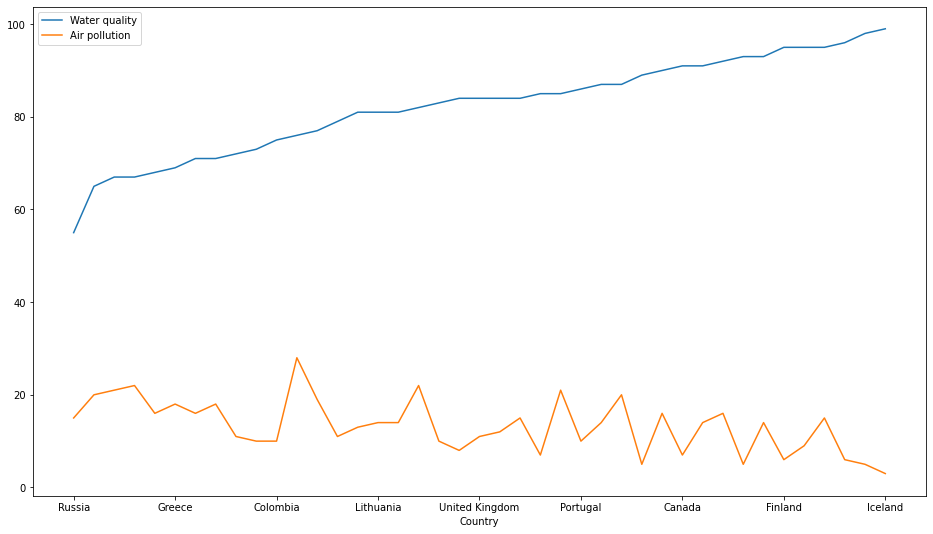

In [119]:
environmental_quality_sorted.plot(figsize=(16, 9))

In [87]:
environmental_quality_sorted.head(5)

,Country,Water quality,Air pollution
Country,,,
Russia,Russia,55,15
Turkey,Turkey,65,20
Israel,Israel,67,21
South Africa,South Africa,67,22
Mexico,Mexico,68,16


<AxesSubplot:xlabel='Country'>

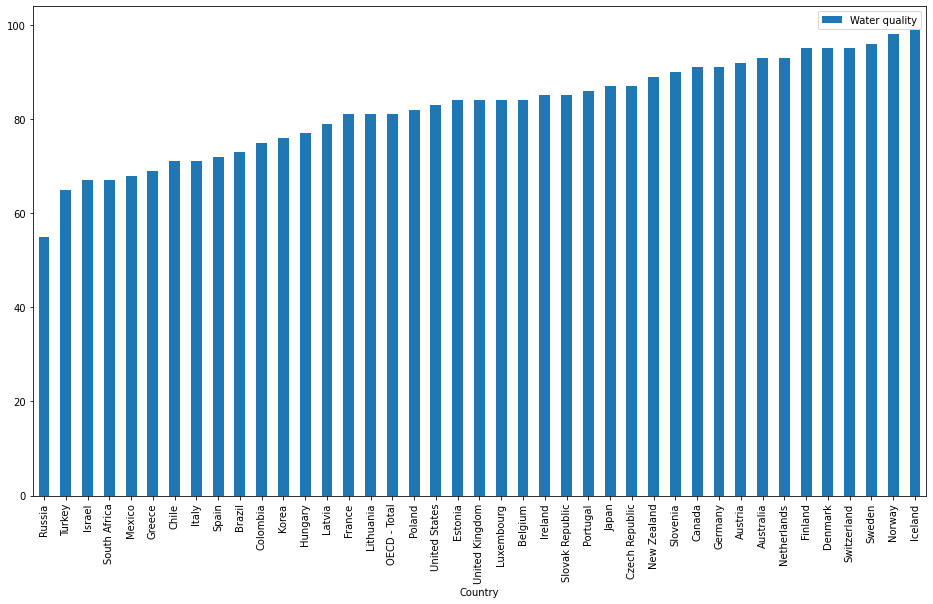

In [88]:
environmental_quality_sorted.plot.bar(
    x="Country",
    y='Water quality',
    figsize=(16, 9))

### Opcion Interactiva: Plotly

<img src="./resources/plotly.png" alt="OECD Better life index"/>

Librería para crear gráficos interactivos. Interfaz de uso muy sencilla, pero extremadamente personalizable. Diseñado para tener una excelente compatibilidad con Pandas.

https://plotly.com/python/

**Express**: Módulo para diseñar gráficos rápidamente usando DataFrames.

https://plotly.com/python/plotly-express/

---



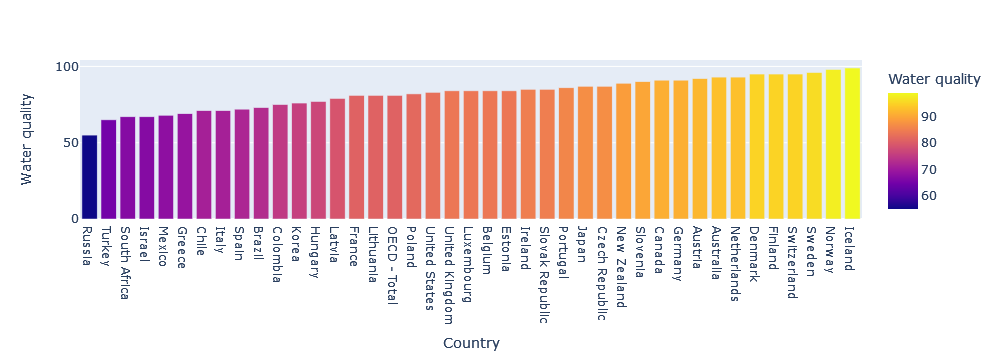

In [89]:
import plotly.express as px

px.bar(environmental_quality.sort_values('Water quality'), 
       x='Country', 
       y='Water quality', 
       color='Water quality')

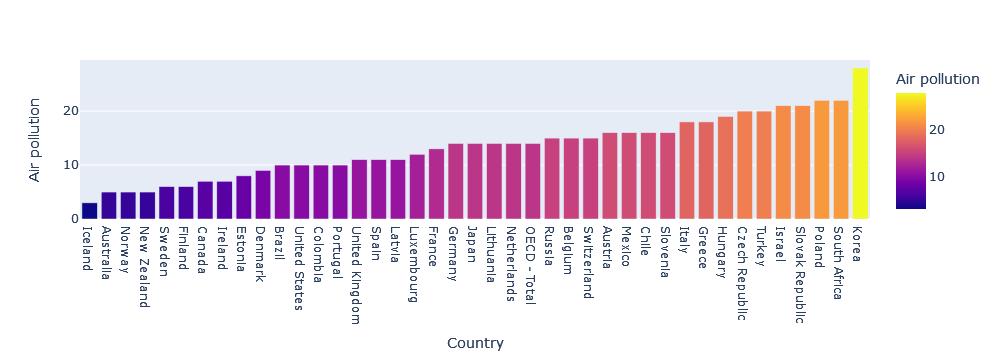

In [77]:
px.bar(environmental_quality.sort_values('Air pollution'), 
       x='Country', 
       y='Air pollution', 
       color='Air pollution')

## 10.- Actividades ✏️

En esta sección usaremos todo lo visto anteriormente para responder preguntas interesantes!

> **Pregunta ❓**:  ¿Existirá una relación entre la calidad del aire y la del agua?

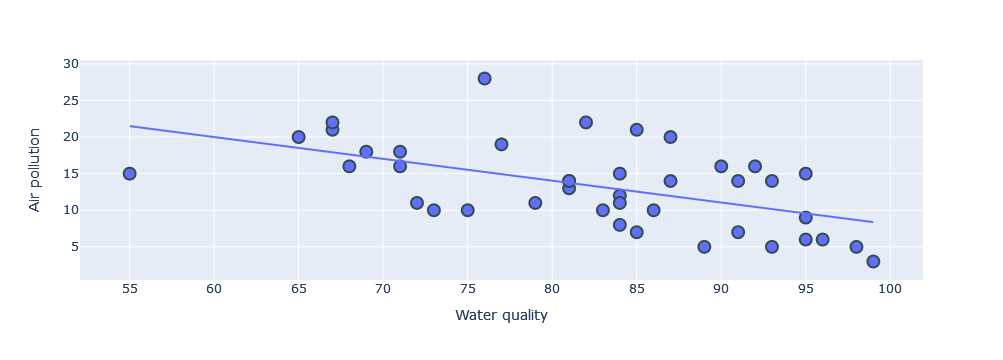

In [90]:
fig = px.scatter(environmental_quality, 
                 y='Air pollution', 
                 x='Water quality', 
                 trendline='ols',
                 hover_data=['Country'])

fig.update_traces(marker=dict(size=12,
                              line=dict(width=2,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))

**Conjuntos de datos interesantes**

Life satisfaction (Subjective well-being)

- **Life satisfaction - nivel de satisfacción con la vida**

Income and Wealth

- **Household net adjusted disposable income - Ingresos de la unidad familiar (después de impuestos)**
- Household net wealth - Riqueza financiera

Work and Life

- Employees working very long hours - exceso de horas de trabajo
- Time devoted to leisure and personal care - tiempo dedicado al ocio y el cuidado personal

Education and skills

- Educational attainment - Logros educativos
- Students’ cognitive skills - Competencias de los estudiantes
- Expected years in education - Años de educación

> **Pregunta ❓**:  ¿Existirá una relación entre el nivel de satisfacción de la vida y los ingresos?

In [79]:
df.columns

Index(['Country', 'Dwellings without basic facilities', 'Housing expenditure',
       'Rooms per person', 'Household net adjusted disposable income',
       'Household net wealth', 'Labour market insecurity', 'Employment rate',
       'Long-term unemployment rate', 'Personal earnings',
       'Quality of support network', 'Educational attainment',
       'Student skills', 'Years in education', 'Air pollution',
       'Water quality', 'Stakeholder engagement for developing regulations',
       'Voter turnout', 'Life expectancy', 'Self-reported health',
       'Life satisfaction', 'Feeling safe walking alone at night',
       'Homicide rate', 'Employees working very long hours',
       'Time devoted to leisure and personal care'],
      dtype='object')

Asignemos primero cuantiles de felicidad

In [80]:
life_satisfaction_quantiles = pd.qcut(df['Life satisfaction'], 
                                      q=5, 
                                      labels = ['Bajísima', 'Baja', 'Media', 'Alta', 'Muy alta'])
life_satisfaction_quantiles.head()

Country
Australia        Alta
Austria          Alta
Belgium         Media
Canada       Muy alta
Chile           Media
Name: Life satisfaction, dtype: category
Categories (5, object): ['Bajísima' < 'Baja' < 'Media' < 'Alta' < 'Muy alta']

In [81]:
df['Life satisfaction quantiles'] = life_satisfaction_quantiles

Ahora grafiquemos. El color de cada punto indicará el cuantil:

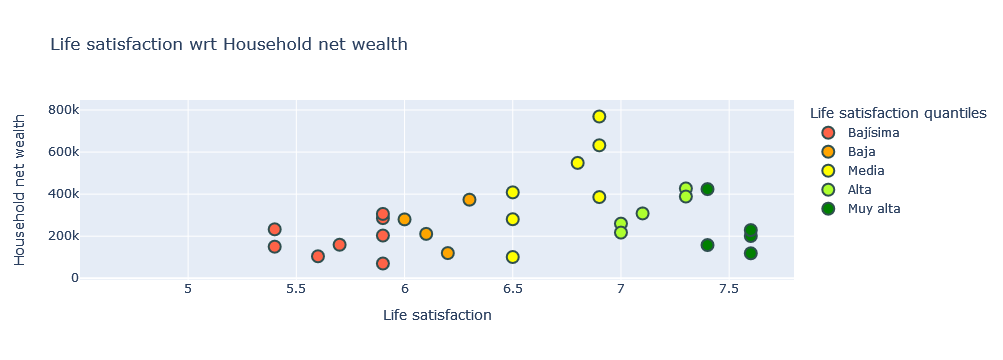

In [82]:
fig = px.scatter(df.sort_values(by='Life satisfaction'), 
                 x='Life satisfaction', 
                 y='Household net wealth', 
                 hover_data=['Country'], 
                 color='Life satisfaction quantiles',
                 title="Life satisfaction wrt Household net wealth",
                 #trendline='ols',
                 color_discrete_sequence=['tomato', 'orange', 'yellow', 'greenyellow', 'green']
                )

fig = fig.update_traces(marker=dict(size=12,
                              line=dict(width=2,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))

fig

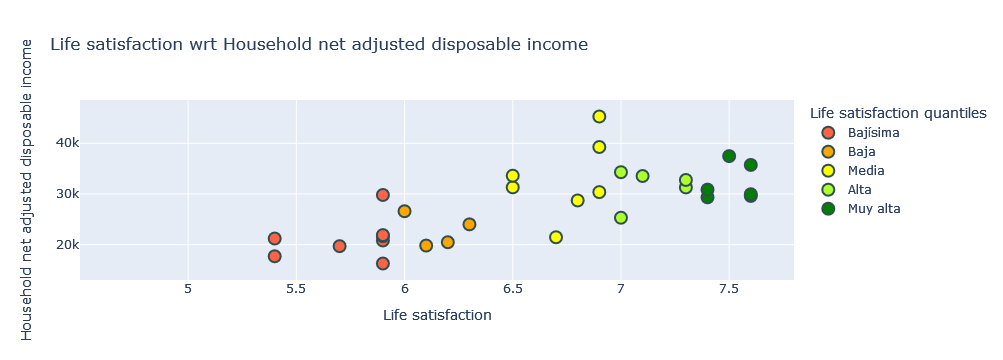

In [83]:
fig = px.scatter(df.sort_values(by='Life satisfaction'), 
                 x='Life satisfaction', 
                 y='Household net adjusted disposable income', 
                 hover_data=['Country'], 
                 color='Life satisfaction quantiles',
                 title="Life satisfaction wrt Household net adjusted disposable income",
                 color_discrete_sequence=['tomato', 'orange', 'yellow', 'greenyellow', 'green']
                )

fig = fig.update_traces(marker=dict(size=12,
                              line=dict(width=2,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))

fig

> **¿Cuál sería su respuesta?**

Otros: Felicidad con respecto a:

- Time devoted to leisure and personal care

- Expected years in education - Años de educación

- Propuesto!

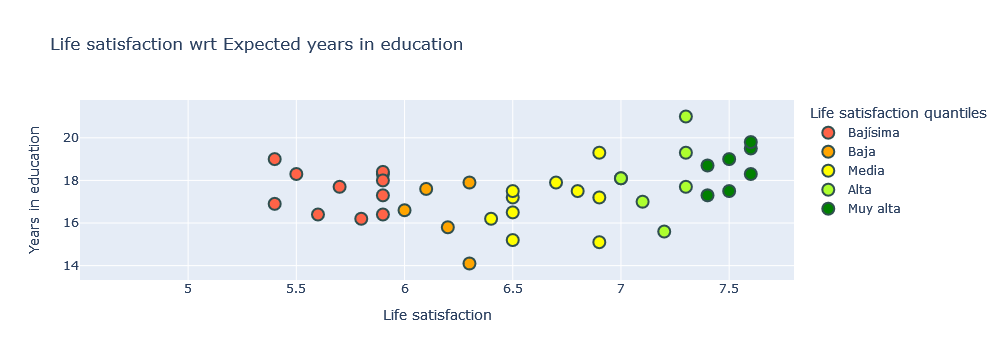

In [84]:
fig = px.scatter(df.sort_values(by='Life satisfaction'), 
                 x='Life satisfaction', 
                 y='Years in education', 
                 hover_data=['Country'], 
                 color='Life satisfaction quantiles',
                 title='Life satisfaction wrt Expected years in education',
                 color_discrete_sequence=['tomato', 'orange', 'yellow', 'greenyellow', 'green']
                )

fig = fig.update_traces(marker=dict(size=12,
                              line=dict(width=2,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))

fig

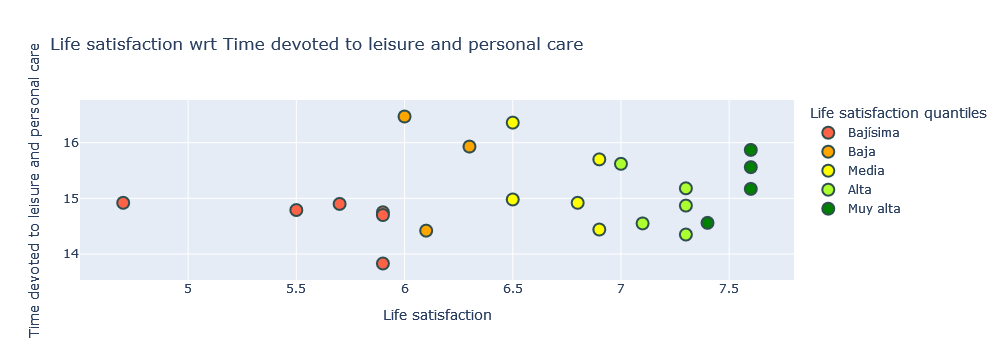

In [85]:
fig = px.scatter(df.sort_values(by='Life satisfaction'), 
                 x='Life satisfaction', 
                 y='Time devoted to leisure and personal care', 
                 hover_data=['Country'], 
                 color='Life satisfaction quantiles',
                 title='Life satisfaction wrt Time devoted to leisure and personal care',
                 color_discrete_sequence=['tomato', 'orange', 'yellow', 'greenyellow', 'green']
                )

fig = fig.update_traces(marker=dict(size=12,
                              line=dict(width=2,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))

fig